In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [11]:
df = pd.read_csv('MyDataFilmsScaled.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117 entries, 0 to 5116
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5117 non-null   int64  
 1   title                 5117 non-null   object 
 2   genres                5117 non-null   object 
 3   original_language     5117 non-null   object 
 4   overview              5116 non-null   object 
 5   popularity            5117 non-null   float64
 6   production_companies  5117 non-null   object 
 7   release_date          5117 non-null   object 
 8   budget                5117 non-null   float64
 9   revenue               5117 non-null   float64
 10  runtime               5117 non-null   float64
 11  status                5117 non-null   object 
 12  vote_average          5117 non-null   float64
 13  vote_count            5117 non-null   float64
 14  credits               5117 non-null   object 
 15  language             

In [13]:
def is_profitable(row):
    if row['revenue'] > row['budget']*1.3:
        return 1
    else:
        return 0

In [14]:
df['is_profitable'] = df.apply(is_profitable, axis=1)

In [15]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count,credits,language,is_profitable
0,15660,Mommie Dearest,Drama,en,Renowned actress Joan Crawford at the height o...,10.589,Paramount-The Irwin Yablans Company,1981-09-18,19.032261,5.0,128.0,Released,6.400,166.0,Faye Dunaway-Diana Scarwid-Steve Forrest-Howar...,1,0
1,230266,Miss Julie,Drama,en,Over the course of a midsummer night in Ferman...,8.633,Maipo Film-The Apocalypse Films,2014-09-07,5.500000,5.0,130.0,Released,5.700,123.0,Jessica Chastain-Colin Farrell-Samantha Morton...,1,0
2,9322,La Femme Nikita,Action-Thriller,fr,A beautiful felon sentenced to life in prison ...,19.647,Gaumont-Cecchi Gori Group Tiger Cinematografic...,1990-02-21,8.538703,5.0,117.0,Released,7.100,1636.0,Anne Parillaud-Jean-Hugues Anglade-Tchéky Kary...,0,0
3,592336,Don't Stop Me Now,Comedy,it,Paola a modern woman used to the hardships of ...,8.115,Wildside-Vision Distribution,2019-04-18,8.000000,5.0,102.0,Released,6.346,331.0,Paola Cortellesi-Stefano Fresi-Vinicio Marchio...,0,0
4,8747,The Black Balloon,Drama,en,Thomas is turning 16. His dad's in the army an...,7.272,Black Balloon Productions,2008-03-08,5.000000,5.0,97.0,Released,6.800,65.0,Toni Collette-Rhys Wakefield-Luke Ford-Gemma W...,1,0


In [31]:
#features target
X = df[['budget','popularity','runtime']] 
y = df[['vote_average']]

In [39]:
model = Ridge(alpha = 500)
model

Ridge(alpha=500)

In [40]:
model.fit(X,y)

Ridge(alpha=500)

In [41]:
model.intercept_
model.coef_

array([4.87980608])

array([[-0.00029061,  0.00088732,  0.01415458]])

In [42]:
model = Ridge(alpha = 5)
model.fit(X,y)
model.intercept_
model.coef_

Ridge(alpha=5)

array([4.87946622])

array([[-0.00029088,  0.00088731,  0.01415771]])

In [43]:
alphas = 10**np.linspace(9,-2,100)*0.5
alphas

array([5.00000000e+08, 3.87131841e+08, 2.99742125e+08, 2.32079442e+08,
       1.79690683e+08, 1.39127970e+08, 1.07721735e+08, 8.34050269e+07,
       6.45774833e+07, 5.00000000e+07, 3.87131841e+07, 2.99742125e+07,
       2.32079442e+07, 1.79690683e+07, 1.39127970e+07, 1.07721735e+07,
       8.34050269e+06, 6.45774833e+06, 5.00000000e+06, 3.87131841e+06,
       2.99742125e+06, 2.32079442e+06, 1.79690683e+06, 1.39127970e+06,
       1.07721735e+06, 8.34050269e+05, 6.45774833e+05, 5.00000000e+05,
       3.87131841e+05, 2.99742125e+05, 2.32079442e+05, 1.79690683e+05,
       1.39127970e+05, 1.07721735e+05, 8.34050269e+04, 6.45774833e+04,
       5.00000000e+04, 3.87131841e+04, 2.99742125e+04, 2.32079442e+04,
       1.79690683e+04, 1.39127970e+04, 1.07721735e+04, 8.34050269e+03,
       6.45774833e+03, 5.00000000e+03, 3.87131841e+03, 2.99742125e+03,
       2.32079442e+03, 1.79690683e+03, 1.39127970e+03, 1.07721735e+03,
       8.34050269e+02, 6.45774833e+02, 5.00000000e+02, 3.87131841e+02,
      

In [44]:
coefs = []
for alpha in alphas:
    #fitting
    model = Ridge(alpha = alpha)
    model.fit(X, y)
    #prediction on test set
    y_pred = model.predict(X)
    coefs.append(model.coef_[0])

Ridge(alpha=500000000.0)

Ridge(alpha=387131841.3405639)

Ridge(alpha=299742125.15947104)

Ridge(alpha=232079441.68063864)

Ridge(alpha=179690683.1902313)

Ridge(alpha=139127970.1103563)

Ridge(alpha=107721734.50159433)

Ridge(alpha=83405026.86000279)

Ridge(alpha=64577483.250744134)

Ridge(alpha=50000000.0)

Ridge(alpha=38713184.13405639)

Ridge(alpha=29974212.515947044)

Ridge(alpha=23207944.16806391)

Ridge(alpha=17969068.31902313)

Ridge(alpha=13912797.011035629)

Ridge(alpha=10772173.450159432)

Ridge(alpha=8340502.686000296)

Ridge(alpha=6457748.325074414)

Ridge(alpha=5000000.0)

Ridge(alpha=3871318.4134056387)

Ridge(alpha=2997421.2515947046)

Ridge(alpha=2320794.416806391)

Ridge(alpha=1796906.8319023128)

Ridge(alpha=1391279.701103563)

Ridge(alpha=1077217.3450159433)

Ridge(alpha=834050.2686000295)

Ridge(alpha=645774.8325074414)

Ridge(alpha=500000.0)

Ridge(alpha=387131.8413405639)

Ridge(alpha=299742.12515947106)

Ridge(alpha=232079.4416806391)

Ridge(alpha=179690.68319023127)

Ridge(alpha=139127.97011035628)

Ridge(alpha=107721.73450159433)

Ridge(alpha=83405.02686000295)

Ridge(alpha=64577.48325074413)

Ridge(alpha=50000.0)

Ridge(alpha=38713.18413405639)

Ridge(alpha=29974.212515947045)

Ridge(alpha=23207.94416806391)

Ridge(alpha=17969.06831902313)

Ridge(alpha=13912.79701103563)

Ridge(alpha=10772.173450159433)

Ridge(alpha=8340.502686000296)

Ridge(alpha=6457.748325074427)

Ridge(alpha=5000.0)

Ridge(alpha=3871.3184134056387)

Ridge(alpha=2997.4212515947042)

Ridge(alpha=2320.794416806391)

Ridge(alpha=1796.9068319023165)

Ridge(alpha=1391.279701103563)

Ridge(alpha=1077.2173450159432)

Ridge(alpha=834.0502686000295)

Ridge(alpha=645.7748325074426)

Ridge(alpha=500.0)

Ridge(alpha=387.1318413405639)

Ridge(alpha=299.7421251594711)

Ridge(alpha=232.0794416806391)

Ridge(alpha=179.69068319023165)

Ridge(alpha=139.1279701103563)

Ridge(alpha=107.72173450159433)

Ridge(alpha=83.40502686000296)

Ridge(alpha=64.57748325074427)

Ridge(alpha=50.0)

Ridge(alpha=38.71318413405639)

Ridge(alpha=29.974212515947105)

Ridge(alpha=23.20794416806391)

Ridge(alpha=17.969068319023165)

Ridge(alpha=13.912797011035629)

Ridge(alpha=10.772173450159434)

Ridge(alpha=8.340502686000296)

Ridge(alpha=6.4577483250744265)

Ridge(alpha=5.0)

Ridge(alpha=3.8713184134056386)

Ridge(alpha=2.9974212515947105)

Ridge(alpha=2.320794416806396)

Ridge(alpha=1.796906831902313)

Ridge(alpha=1.391279701103563)

Ridge(alpha=1.0772173450159432)

Ridge(alpha=0.8340502686000313)

Ridge(alpha=0.6457748325074414)

Ridge(alpha=0.5)

Ridge(alpha=0.3871318413405639)

Ridge(alpha=0.2997421251594711)

Ridge(alpha=0.23207944168063957)

Ridge(alpha=0.1796906831902313)

Ridge(alpha=0.1391279701103563)

Ridge(alpha=0.10772173450159434)

Ridge(alpha=0.08340502686000313)

Ridge(alpha=0.0645774832507444)

Ridge(alpha=0.05)

Ridge(alpha=0.03871318413405639)

Ridge(alpha=0.029974212515947105)

Ridge(alpha=0.023207944168063956)

Ridge(alpha=0.01796906831902313)

Ridge(alpha=0.01391279701103563)

Ridge(alpha=0.010772173450159434)

Ridge(alpha=0.008340502686000313)

Ridge(alpha=0.00645774832507444)

Ridge(alpha=0.005)

In [45]:
alphas
coefs

array([5.00000000e+08, 3.87131841e+08, 2.99742125e+08, 2.32079442e+08,
       1.79690683e+08, 1.39127970e+08, 1.07721735e+08, 8.34050269e+07,
       6.45774833e+07, 5.00000000e+07, 3.87131841e+07, 2.99742125e+07,
       2.32079442e+07, 1.79690683e+07, 1.39127970e+07, 1.07721735e+07,
       8.34050269e+06, 6.45774833e+06, 5.00000000e+06, 3.87131841e+06,
       2.99742125e+06, 2.32079442e+06, 1.79690683e+06, 1.39127970e+06,
       1.07721735e+06, 8.34050269e+05, 6.45774833e+05, 5.00000000e+05,
       3.87131841e+05, 2.99742125e+05, 2.32079442e+05, 1.79690683e+05,
       1.39127970e+05, 1.07721735e+05, 8.34050269e+04, 6.45774833e+04,
       5.00000000e+04, 3.87131841e+04, 2.99742125e+04, 2.32079442e+04,
       1.79690683e+04, 1.39127970e+04, 1.07721735e+04, 8.34050269e+03,
       6.45774833e+03, 5.00000000e+03, 3.87131841e+03, 2.99742125e+03,
       2.32079442e+03, 1.79690683e+03, 1.39127970e+03, 1.07721735e+03,
       8.34050269e+02, 6.45774833e+02, 5.00000000e+02, 3.87131841e+02,
      

[array([2.59177700e-05, 1.03319589e-04, 6.59914401e-05]),
 array([3.28943051e-05, 1.29611270e-04, 8.50505136e-05]),
 array([4.15670447e-05, 1.61407566e-04, 1.09552795e-04]),
 array([5.22515539e-05, 1.99241822e-04, 1.41016394e-04]),
 array([6.52754337e-05, 2.43395898e-04, 1.81362058e-04]),
 array([8.09566297e-05, 2.93765324e-04, 2.33008402e-04]),
 array([9.95732440e-05, 3.49738819e-04, 2.98982858e-04]),
 array([0.00012132, 0.00041013, 0.00038305]),
 array([0.00014628, 0.00047322, 0.00048982]),
 array([0.00017431, 0.00053686, 0.00062493]),
 array([0.00020503, 0.00059878, 0.00079506]),
 array([0.00023767, 0.00065681, 0.00100799]),
 array([0.00027101, 0.0007092 , 0.00127252]),
 array([0.00030328, 0.00075475, 0.00159807]),
 array([0.00033221, 0.00079293, 0.00199414]),
 array([0.00035514, 0.00082376, 0.00246929]),
 array([0.00036931, 0.00084773, 0.00302978]),
 array([0.00037229, 0.00086565, 0.00367791]),
 array([0.0003624 , 0.00087846, 0.00441031]),
 array([0.0003391 , 0.00088714, 0.00521664

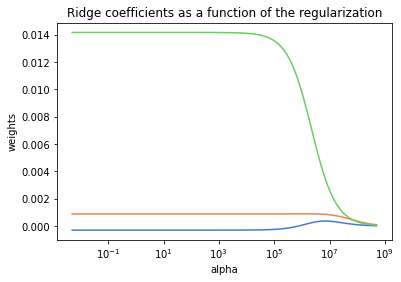

In [46]:
fig, ax = plt.subplots()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('weights')
ax.set_title('Ridge coefficients as a function of the regularization');